In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from matplotlib import pyplot as plt
import os.path

In [3]:
if not os.path.isfile('lab_helper.py'):
    ! wget https://github.com/lab-ml-itba/Laboratorio-01/raw/master/lab_helper.py

In [4]:
from lab_helper import plot_boundaries, get_polynimial_set, plot_gaussians

# Generación de datos

In [5]:
def generate_elipse_data(N=500, random_state=42):
    np.random.seed(random_state)
    X = 2*(np.random.rand(N, 2)-0.5)
    y = 1*(2*(X[:,0]**2 + 2*X[:,1]**2 - 2*X[:,1]*X[:,0])<0.8)
    return X, y
    

    
def generate_gaussians_distributions(N=500, random_state=42):
    np.random.seed(random_state)
    X1 = np.random.multivariate_normal([0.5, 0.5], [[0.1,-0.085],[-0.085,0.1]], N//2)
    X2 = np.random.multivariate_normal([-0.25, -0.25], [[0.1,0],[0,0.1]], N//2)
    X = np.append(X1, X2, axis=0)
    y = np.append(np.zeros(N//2), np.ones(N//2))
    return X, y

In [6]:
A,B = generate_gaussians_distributions()
print(A)

[[ 3.36956248e-01  6.39095672e-01]
 [ 4.34911476e-01  8.28885033e-01]
 [ 5.50938113e-01  4.08508176e-01]
 [ 8.61629700e-02  1.04676062e+00]
 [ 6.89772138e-01  4.04202018e-01]
 [ 6.00609609e-01  3.18723631e-01]
 [ 2.60715118e-01  4.07895022e-01]
 [ 9.75917750e-01 -7.33088064e-02]
 [ 8.35255177e-01  2.19174058e-01]
 [ 6.53855653e-01  1.01526171e-01]
 [ 3.46875281e-02  9.26206870e-01]
 [ 3.56075286e-01  3.97151089e-01]
 [ 6.75173720e-01  3.44038636e-01]
 [ 8.82597433e-01  1.82475373e-01]
 [ 6.57415706e-01  2.92061454e-01]
 [ 8.43413918e-01  4.77410075e-01]
 [ 4.12504567e-01  4.04294526e-01]
 [ 1.44104570e-01  6.44439107e-01]
 [ 2.66764206e-01  3.93810971e-01]
 [ 9.21000700e-01  1.13096667e-01]
 [ 2.90245086e-01  7.39436771e-01]
 [ 5.09096707e-01  4.38750603e-01]
 [ 8.87334571e-01 -1.20152453e-02]
 [ 7.31647283e-01  4.51451657e-01]
 [ 2.42808821e-01  4.51823667e-01]
 [ 3.68084605e-01  5.65217188e-01]
 [ 7.58850509e-01  3.47094932e-01]
 [ 2.67084961e-01  8.94217487e-01]
 [ 7.28459468e-01  2

# Selección del Dataset

Dos tipos de datasets:
- generate_gaussians_distributions: Generado con dos gaussianas
- generate_elipse_data: Generado con distribución uniforme en el cuadrado [-1, 1], [-1, 1] y recortando con una elipse en el centro

Descomentar/comentar las lineas correspondientes para seleccionar uno u otro dataset

In [46]:
#X, y = generate_gaussians_distributions()
X, y = generate_elipse_data()

# Graficamos

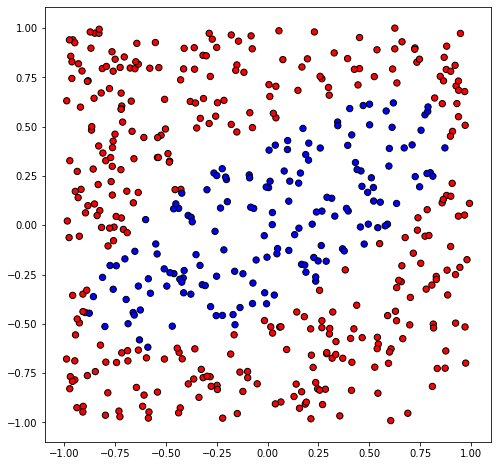

In [47]:
plt.figure(figsize=(8,8))
plot_boundaries(X,y)

# Inicialización del modelo

Para Naive Bayes probar con: 
- priors=None, var_smoothing=1e-09 (Ambos datasets)
- priors=None, var_smoothing=0.2 (para generate_elipse_data) var_smoothing=1 (para generate_gaussians_distributions) 
- priors=[0.5, 0.5] (para generate_elipse_data) priors=[0.7, 0.3] (para generate_gaussians_distributions), var_smoothing=1e-09 

Para QDA:
- priors=None, reg_param=0.0, store_covariance=True (Ambos modelos)
- Cambio los parámetros como quiera y verifique si ocurre lo esperado

In [71]:
model = GaussianNB(priors=None, var_smoothing=1e-09)
#model = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0, store_covariance=True)

In [72]:
# Entrenamiento del modelo
model.fit(X,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [73]:
if type(model)==GaussianNB:
    print(model.classes_) 
    prior1, prior2 = model.class_prior_
    sigma1, sigma2 = model.sigma_
    mu1, mu2 = model.theta_

[0 1]


In [74]:
if type(model)==QuadraticDiscriminantAnalysis:
    print(model.classes_) 
    prior1, prior2 =  model.priors_
    mu1, mu2 = model.means_
    sigma1, sigma2 = model.covariance_

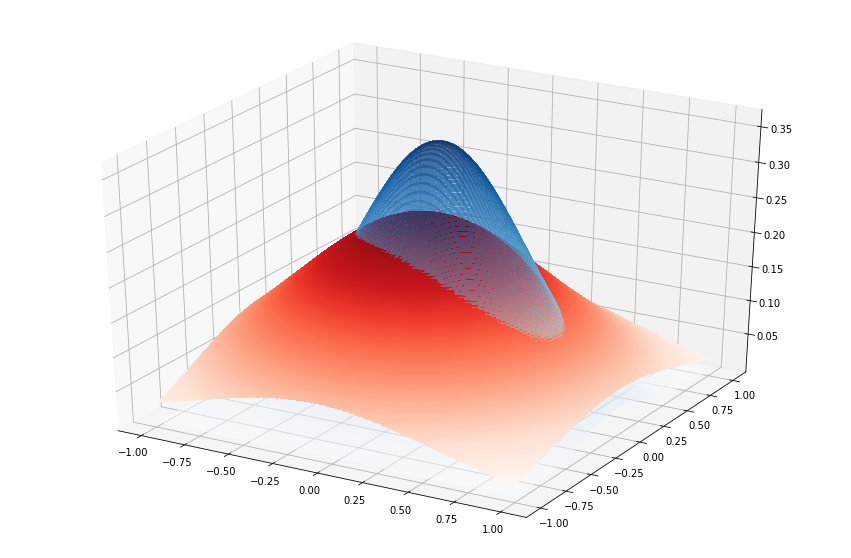

In [75]:
plot_gaussians(X, mu1, sigma1, mu2, sigma2, prior1, prior2)

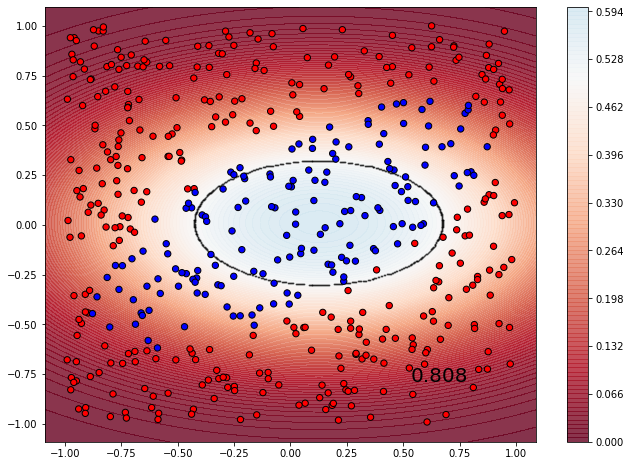

In [76]:
score = model.score(X,y)
plt.figure(figsize=(11,8))
plot_boundaries(X,y, score, probability_func=model.predict_proba, mesh_res=500)

In [78]:
score

0.808

In [79]:
model.class_prior_

array([0.682, 0.318])